<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-기계학습(50점)" data-toc-modified-id="1.-기계학습(50점)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. 기계학습(50점)</a></span><ul class="toc-item"><li><span><a href="#1.1-데이터-탐색" data-toc-modified-id="1.1-데이터-탐색-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.1 데이터 탐색</a></span><ul class="toc-item"><li><span><a href="#1.1.2.-앞선-두-단계에서-얻은-향후-분석시-고려사항-작성" data-toc-modified-id="1.1.2.-앞선-두-단계에서-얻은-향후-분석시-고려사항-작성-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>1.1.2. 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성</a></span></li></ul></li><li><span><a href="#1.2-클래스-불균형을-처리하시오." data-toc-modified-id="1.2-클래스-불균형을-처리하시오.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1.2 클래스 불균형을 처리하시오.</a></span><ul class="toc-item"><li><span><a href="#1.2.1.-업-샘플링-과정-설명하고-결과-작성" data-toc-modified-id="1.2.1.-업-샘플링-과정-설명하고-결과-작성-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>1.2.1. 업 샘플링 과정 설명하고 결과 작성</a></span></li><li><span><a href="#1.2.2-언더-샘플링-과정-설명하고-결과-작성" data-toc-modified-id="1.2.2-언더-샘플링-과정-설명하고-결과-작성-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>1.2.2 언더 샘플링 과정 설명하고 결과 작성</a></span></li><li><span><a href="#1.2.3-둘-중-선택하고-이유-설명" data-toc-modified-id="1.2.3-둘-중-선택하고-이유-설명-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>1.2.3 둘 중 선택하고 이유 설명</a></span></li></ul></li><li><span><a href="#1.3.-모델링-하시오" data-toc-modified-id="1.3.-모델링-하시오-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>1.3. 모델링 하시오</a></span><ul class="toc-item"><li><span><a href="#1.3.1.-최소-3개-이상-알고리즘-제시하고-정확도-측면의-모델-1개와-속도-측면의-모델-1개를-꼭-구현(총-2개-이상)" data-toc-modified-id="1.3.1.-최소-3개-이상-알고리즘-제시하고-정확도-측면의-모델-1개와-속도-측면의-모델-1개를-꼭-구현(총-2개-이상)-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>1.3.1. 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)</a></span></li><li><span><a href="#1.3.2.-모델-비교하고-결과-설명" data-toc-modified-id="1.3.2.-모델-비교하고-결과-설명-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>1.3.2. 모델 비교하고 결과 설명</a></span></li><li><span><a href="#1.3.3.-속도-개선을-위한-차원-축소-설명하고-수행,-예측-성능과-속도-비교하고-결과-작성" data-toc-modified-id="1.3.3.-속도-개선을-위한-차원-축소-설명하고-수행,-예측-성능과-속도-비교하고-결과-작성-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>1.3.3. 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성</a></span></li></ul></li></ul></li></ul></div>

## 1. 기계학습(50점)

### 1.1 데이터 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')

df = pd.read_csv('../data/diabetes_for_test.csv')

#sns.pairplot(df)
print(df.columns)

print(''' 
Age에 3개의 이상치가 보인다.
SkinThickness와 Glucose, BloodPressure, Insulin, BMI 등에 0측정된 값이 보인다. 정상값인지 판단 필요하다.     
''')

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
 
Age에 3개의 이상치가 보인다.
SkinThickness와 Glucose, BloodPressure, Insulin, BMI 등에 0측정된 값이 보인다. 정상값인지 판단 필요하다.     



In [2]:
testdf = df.copy()

print(''' 각 설명변수 별로 0인 데이터들이 보인다. 
      이 경우 당뇨병 진단 여부에 따라 한쪽으로 치우치진 않았는지 검토한다.  
''')

print(testdf[testdf.SkinThickness == 0].Outcome.value_counts())
print(testdf[testdf.Glucose == 0].Outcome.value_counts())
print(testdf[testdf.BloodPressure == 0].Outcome.value_counts())
print(testdf[testdf.Insulin == 0].Outcome.value_counts())
print(testdf[testdf.BMI  == 0].Outcome.value_counts())

print(''' 
측정치가 0인 데이터들을 당뇨병 판정여부를 기준으로 봤을 때, 
      어느 한쪽으로 치우친 경향을 보이지는 않으므로, 0인 경우 해당 특성의 중앙값으로 대체한다. 
''')

testdf.replace({'SkinThickness':0}, testdf.SkinThickness.median(), inplace=True)
testdf.replace({'Glucose':0}, testdf.Glucose.median(), inplace=True)
testdf.replace({'BloodPressure':0}, testdf.BloodPressure.median(), inplace=True)
testdf.replace({'Insulin':0}, testdf.Insulin.median(), inplace=True)
testdf.replace({'BMI':0}, testdf.BMI.median(), inplace=True)

print(''' 
Age열이 999로 설정되어 있는 3개의 데이터가 있다. 
      이 데이터 역시 중앙값으로 대치한다.
''')

testdf.replace({'Age':999}, testdf.Age.median(), inplace=True)


 각 설명변수 별로 0인 데이터들이 보인다. 
      이 경우 당뇨병 진단 여부에 따라 한쪽으로 치우치진 않았는지 검토한다.  

Outcome
0    139
1     88
Name: count, dtype: int64
Outcome
0    3
1    2
Name: count, dtype: int64
Outcome
0    19
1    16
Name: count, dtype: int64
Outcome
0    236
1    138
Name: count, dtype: int64
Outcome
0    9
1    2
Name: count, dtype: int64
 
측정치가 0인 데이터들을 당뇨병 판정여부를 기준으로 봤을 때, 
      어느 한쪽으로 치우친 경향을 보이지는 않으므로, 0인 경우 해당 특성의 중앙값으로 대체한다. 

 
Age열이 999로 설정되어 있는 3개의 데이터가 있다. 
      이 데이터 역시 중앙값으로 대치한다.



<Axes: >

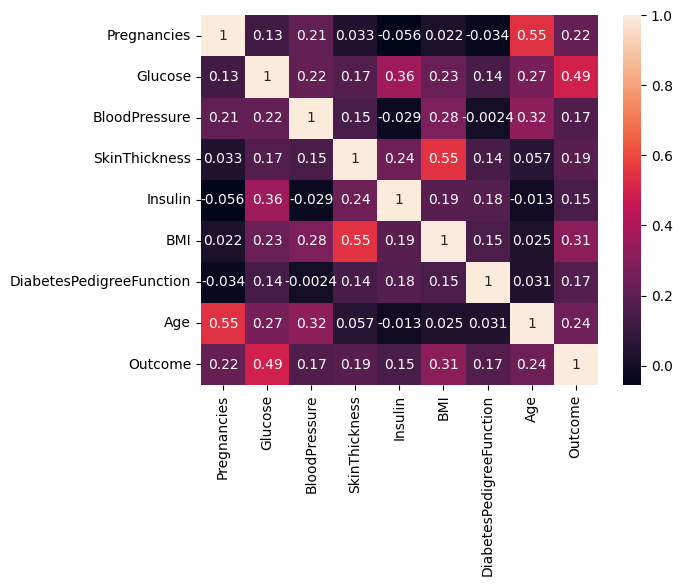

In [3]:
sns.heatmap(testdf.corr(),annot=True)

In [4]:
from scipy.stats import shapiro, levene, ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.oneway import anova_oneway

testcols = df.columns.tolist()
testcols.remove('Outcome') 

ttestdf = pd.DataFrame()

for i, col in enumerate(testcols):
     ttestdf.loc[i, '설명변수'] = col
     stat = shapiro(testdf[testdf.Outcome==0][col].tolist())
     ttestdf.loc[i, 'group0 정규성'] = stat.pvalue > 0.05
     stat = shapiro(testdf[testdf.Outcome==1][col].tolist())
     ttestdf.loc[i, 'group1 정규성'] = stat.pvalue > 0.05
     stat = levene(testdf[testdf.Outcome==0][col], testdf[testdf.Outcome==1][col])
     ttestdf.loc[i, '등분산성'] = equ_var = stat.pvalue > 0.05
     # 여기서는 독립적인 2개의 집단의 평균을 비교하므로 ttest_independant를 사용하면 맞다.
     stat = ttest_ind(testdf[testdf.Outcome==0][col], testdf[testdf.Outcome==1][col], equal_var=equ_var)
     ttestdf.loc[i, 't-test diff'] = stat.pvalue < 0.05

     # 여러 집단인 경우 anova_oneway나 ols를 사용할 수 있지만, 이 경우에도 적용에 큰 무리는 없다.
     stat = ols(f'{col}~C(Outcome)', testdf).fit()
     ttestdf.loc[i, 'ols diff'] = anova_lm(stat).loc['C(Outcome)', 'PR(>F)'] < 0.05

     stat = anova_oneway(data=testdf[col], groups=testdf.Outcome, use_var='equal')
     ttestdf.loc[i, 'anova diff'] = stat.pvalue < 0.05
     ttestdf.loc[i, 'Group_0 mean'] = testdf[testdf.Outcome == 0][col].mean()
     ttestdf.loc[i, 'Group_1 mean'] = testdf[testdf.Outcome == 1][col].mean()

print(''' 
아래 표에서 확인할 수 있는 바와 같이, 
      각 설명변수 데이터가 모두 정규성과 등분산성의 가정을 만족되진 않는다.

하지만 데이터의 경향성을 파악하는 차원에서 평균차이 검정을 수행한 결과, 
      당뇨병이 있는 집단과 없는 집단에서 유의미가 한 차이가 있는 것으로 나타난다.

각 설명변수 별로 보면, 당뇨병이 있는 경우,
      - Pregnancies의 평균이 유의미하게 높다.
      - Glucose의 평균이 유의미하게 높다.
      - BloodPressure 평균이 유의미하게 높다.
      - SkinThickness 평균이 유의미하게 높다.
      - Insulin 평균이 유의미하게 높다.
      - BMI 평균이 유의미하게 높다.
      - DiabetesPedigreeFunction의 평균이 유의미하게 높다.
      - Age의 평균이 유의미하게 높다.
''')  

ttestdf

 
아래 표에서 확인할 수 있는 바와 같이, 
      각 설명변수 데이터가 모두 정규성과 등분산성의 가정을 만족되진 않는다.

하지만 데이터의 경향성을 파악하는 차원에서 평균차이 검정을 수행한 결과, 
      당뇨병이 있는 집단과 없는 집단에서 유의미가 한 차이가 있는 것으로 나타난다.

각 설명변수 별로 보면, 당뇨병이 있는 경우,
      - Pregnancies의 평균이 유의미하게 높다.
      - Glucose의 평균이 유의미하게 높다.
      - BloodPressure 평균이 유의미하게 높다.
      - SkinThickness 평균이 유의미하게 높다.
      - Insulin 평균이 유의미하게 높다.
      - BMI 평균이 유의미하게 높다.
      - DiabetesPedigreeFunction의 평균이 유의미하게 높다.
      - Age의 평균이 유의미하게 높다.



,설명변수,group0 정규성,group1 정규성,등분산성,t-test diff,ols diff,anova diff,Group_0 mean,Group_1 mean
0,Pregnancies,False,False,False,True,True,True,3.298000,4.865672
1,Glucose,False,False,False,True,True,True,110.682000,142.130597
2,BloodPressure,False,False,True,True,True,True,70.920000,75.123134
3,SkinThickness,False,False,False,True,True,True,26.058000,29.716418
4,Insulin,False,False,False,True,True,True,83.188000,116.041045
5,BMI,False,False,True,True,True,True,30.880200,35.381343
6,DiabetesPedigreeFunction,False,False,False,True,True,True,0.429734,0.550500
7,Age,False,False,True,True,True,True,31.114000,37.067164


당뇨병이 있는 사람은 없는 사람보다 pregnancies의 평균 수치가 높다.

당뇨병이 있는 사람은 없는 사람 보다 Glucose의 평균 수치가 높다.

당뇨병이 있는 사람은 없는 사람 보다 Insulin의 평균 수치가 높다.

당뇨병이 있는 사람은 없는 사람 보다 BMI의 평균 수치가 높다.

Outcome을 제외한 변수들 간의 상관성을 보았을 때, 0.9 이상의 상관관계를 가지는 변수는 없었다. 그러므로 모든 변수를 사용하여 모델링해도 될 것으로 판단된다. 

(2) 이상치를 식별하고 처리하시오. 

우선 describe로 변수들을 살펴보았을 때, 각 변수들의 결측치는 없는 것을 확인하였다. 이상치를 판단하기 위해서는 mean, min, max값을 확인하는 것이 좋다. 평균과 min, 평균과 max 값이 std에 비해 한참 차이가 난다면, 이상치가 있을 가능성이 높다. 
이러한 이상치를 정확히 판단하기 위해서는 아래와 같이 boxplot으로 시각화하여 보는 것이정확하다. 


Age 컬럼에 눈에띄는 이상치(999)가 있어 Age의 중앙값인 29 로 이상치를 대체한다. 

추가적으로 데이터를 살펴 보았을 때, Glucose와 BloodPressure컬럼에는 0이 존재하지 않아야 된다고 판단되었다. 이를 이상치라고 판단하여 이상치를 제외한 중앙값으로 이상치를 대체하였다.

#### 1.1.2. 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성

위에 describe() 함수를 보게 되면, 최솟값과 최댓값 차이가 많이 나는 컬럼이 존재한다. 따라서 선형모델 사용시 scale을 적용할 필요가 보인다.

### 1.2 클래스 불균형을 처리하시오.

#### 1.2.1. 업 샘플링 과정 설명하고 결과 작성

In [5]:
print('''아래 내용에서 보듯 당뇨병 진단자(1)는 미진단자(0)의 반 밖에 안된다. 따라서 진단자(1)를 오버샘플링할 필요가 있다.
오버샘플링(업샘플링)하는 기법에는 다음과 같은 것이 있다.
      1. 랜덤 오버샘플링
        - 적은 클래스의 샘플을 랜덤 샘플링하여 복제하는 방식이다. 
        - 복제된 데이터의 가중치를 높이는 효과가 있어, 과적합 우려가 있다.
      2. SMOTE(Synthetic Minority oversampling technique)
        - 적은 클래스의 데이터를 랜덤 샘플링한 후, 해당 샘플 주위 k개의 이웃들을 찾는다.
        - 이 샘플과 k개의 이웃 사이의 속성을 갖는 새로운 샘플을 생성한다.
      3. Borderline SMOTE
        - SMOTE를 시행하는데, 이 때 랜덤샘플링이 아니라 클래스를 구분짓는 경계면(Borderline)에 위치한 데이터를 샘플링한다.
        - 먼저 적은 클래스의 데이터를 랜덤샘플링 후 이웃 k개를 찾아내는데, 이 중 많은 클래스가 있다면 경계면 데이터로 판정.
        - 이 경계면 데이터에 대해 SMOTE를 적용한다.
      3. K-means SMOTE
        - 먼저 K-means 클러스터링을 수행한 후, 많은 클래스의 데이터가 속한 클래스는 버린다.
        - 적은 클래스의 데이터가 속한 클러스터의 데이터에 대해 SMOTE 적용
      4. SVM MOTE
        - 우선 SVM 학습을 진행한 후 Support Vector 샘플 중 적은 클래스에 속한 데이터에 대해 SMOTE 적용한다.
''')
testdf.Outcome.value_counts()

아래 내용에서 보듯 당뇨병 진단자(1)는 미진단자(0)의 반 밖에 안된다. 따라서 진단자(1)를 오버샘플링할 필요가 있다.
오버샘플링(업샘플링)하는 기법에는 다음과 같은 것이 있다.
      1. 랜덤 오버샘플링
        - 적은 클래스의 샘플을 랜덤 샘플링하여 복제하는 방식이다. 
        - 복제된 데이터의 가중치를 높이는 효과가 있어, 과적합 우려가 있다.
      2. SMOTE(Synthetic Minority oversampling technique)
        - 적은 클래스의 데이터를 랜덤 샘플링한 후, 해당 샘플 주위 k개의 이웃들을 찾는다.
        - 이 샘플과 k개의 이웃 사이의 속성을 갖는 새로운 샘플을 생성한다.
      3. Borderline SMOTE
        - SMOTE를 시행하는데, 이 때 랜덤샘플링이 아니라 클래스를 구분짓는 경계면(Borderline)에 위치한 데이터를 샘플링한다.
        - 먼저 적은 클래스의 데이터를 랜덤샘플링 후 이웃 k개를 찾아내는데, 이 중 많은 클래스가 있다면 경계면 데이터로 판정.
        - 이 경계면 데이터에 대해 SMOTE를 적용한다.
      3. K-means SMOTE
        - 먼저 K-means 클러스터링을 수행한 후, 많은 클래스의 데이터가 속한 클래스는 버린다.
        - 적은 클래스의 데이터가 속한 클러스터의 데이터에 대해 SMOTE 적용
      4. SVM MOTE
        - 우선 SVM 학습을 진행한 후 Support Vector 샘플 중 적은 클래스에 속한 데이터에 대해 SMOTE 적용한다.



Outcome
0    500
1    268
Name: count, dtype: int64

Upsampling은 소수 클래스를 늘려서 다수 클래스 개수에 맞추는 방식으로,  
대표적으로 random으로 소수의 클래스을 선택하여 데이터를 복제하는 RandomOverSampler, 임의의 소수 클래스 주변으로 새로운 데이터를 생성하는 smote 방식이 있다.

#### 1.2.2 언더 샘플링 과정 설명하고 결과 작성

In [6]:
print('''아래 내용에서 보듯 당뇨병 진단자(1)는 미진단자(0)의 반 밖에 안된다. 따라서 진단자(1)를 오버샘플링할 필요가 있다.
        
언더샘플링(다운샘플링)하는 기법에는 다음과 같은 것이 있다.
      1. 랜덤 언더샘플링
        - 많은 클래스의 데이터를 랜덤 샘플링하여 제거하는 방식이다.
      2. 토멕링크(Tomek Links)
        - 토멕링크란 서로 다른 클래스의 데이터를 연결하는 선인데, 해당 선 길이보다 더 짧게 연결할 수 없을 때 이를 토멕링크라고 한다.
        - 토멕링크에 해당하는 많은 클래스의 데이터를 제거하여, 클래스 간 구분선을 보다 명확하게 한다.
      3. CNN (Condensed Nearest Neighbor)
        - 소수 Class 전체 + 다수 Class에서 무작위로 하나의 관측치 A를 선택
        - 원데이터에 대한 1-NN 적용분류하는데 소수클래스 쪽에 가까운 데이터만 남기고, A에 가까운 데이터를 삭제
        - 이렇게 함으로써 분류 성능에 큰 영향이 없는 데이터를 삭제하고, 클래스간 경계면이 데이터를 남기는 방식을 취한다.
''')

아래 내용에서 보듯 당뇨병 진단자(1)는 미진단자(0)의 반 밖에 안된다. 따라서 진단자(1)를 오버샘플링할 필요가 있다.
        
언더샘플링(다운샘플링)하는 기법에는 다음과 같은 것이 있다.
      1. 랜덤 언더샘플링
        - 많은 클래스의 데이터를 랜덤 샘플링하여 제거하는 방식이다.
      2. 토멕링크(Tomek Links)
        - 토멕링크란 서로 다른 클래스의 데이터를 연결하는 선인데, 해당 선 길이보다 더 짧게 연결할 수 없을 때 이를 토멕링크라고 한다.
        - 토멕링크에 해당하는 많은 클래스의 데이터를 제거하여, 클래스 간 구분선을 보다 명확하게 한다.
      3. CNN (Condensed Nearest Neighbor)
        - 소수 Class 전체 + 다수 Class에서 무작위로 하나의 관측치 A를 선택
        - 원데이터에 대한 1-NN 적용분류하는데 소수클래스 쪽에 가까운 데이터만 남기고, A에 가까운 데이터를 삭제
        - 이렇게 함으로써 분류 성능에 큰 영향이 없는 데이터를 삭제하고, 클래스간 경계면이 데이터를 남기는 방식을 취한다.



undersampling은 다수 클래스를 감소시켜 소수 클래스 개수에 맞추는 방식으로,  
대표적으로 random으로 다수의 클래스의 데이터를 선택하여 삭제하는 RandomUnderSampler, 서로 다른 클래스가 있을 때 서로 다른 클래스끼리 가장 가까운 데이터들이 토멕링크로 묶여서 토멕링크 중 다수 클래스의 데이터를 제거하는 Tomek link방식이 있다.

#### 1.2.3 둘 중 선택하고 이유 설명

현 데이터가 총 768개로 적은 데이터가 존재한다.. 따라서, undersampling을 선택하게 되면 데이터가 더 적어지기 때문에 오버피팅이 일어날 위험이 더 크다.  
**oversampling을 선택할 것 이다**.

In [3]:
from sklearn.preprocessing import StandardScaler

features = testdf.drop('Outcome', axis=1)
target = testdf.Outcome

sc = StandardScaler()
features = pd.DataFrame(sc.fit_transform(features), columns=features.columns)

In [4]:
from imblearn.over_sampling import KMeansSMOTE
from collections import Counter

ks = KMeansSMOTE(random_state=11, k_neighbors=5)
bal_features, bal_target = ks.fit_resample(features, target)

print(f'original distribution {Counter(target)}')
print(f'resampled distribution {Counter(bal_target)}')

features = bal_features
target = bal_target

original distribution Counter({0: 500, 1: 268})
resampled distribution Counter({1: 502, 0: 500})


### 1.3. 모델링 하시오

#### 1.3.1. 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)

속도 측면에서 logisticregression,정확도 측면에서 svm, 기타로 xgboost를 제시한다

In [38]:
# 0/1 분류 예측을 위하여 다음 3개의 모델을 적용한다.
#   - LogisticRegression
#   - SVM Classifier
#   - RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model_lr = LogisticRegression()
param_lr = { 'penalty' : ['l2'],
            'C' : [0.003, 0.005, 0.01],
            'solver' : ['lbfgs','liblinear'],
            'max_iter' : [1000, 1500]}

gs_lr = GridSearchCV(model_lr, param_grid=param_lr, cv=4)
gs_lr.fit(features, target)

print(f'LogisticRegression Best params {gs_lr.best_params_}')
print(f'LogisticRegression Best scores {gs_lr.best_score_}')

LogisticRegression Best params {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression Best scores 0.8005099601593625


In [42]:
from sklearn.svm import SVC

model_svm = SVC()
grid_svm = { 'C': [0.08, 1, 1.2],             # 에러율 조절 (커지면 과적합)
             'gamma': [0.005, 0.01, 0.02, 10],          # 학습정도 조절 (커지면 과적합)
             'kernel': ['linear', 'rbf']}   # 경계면의 곡선화   

gs_svm = GridSearchCV(model_svm, param_grid=grid_svm, cv=4)
gs_svm.fit(features, target)

print(f'SVM Best params {gs_svm.best_params_}')
print(f'SVM Best scores {gs_svm.best_score_}')

SVM Best params {'C': 1, 'gamma': 0.02, 'kernel': 'rbf'}
SVM Best scores 0.8025338645418326


In [40]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()
param_rfc = {   'n_estimators': [200, 500, 800],
                'max_depth': [5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}

gs_rfc = GridSearchCV(model_rfc, param_grid=param_rfc, cv=4)
gs_rfc.fit(features, target)

print(f'RandomForestClassifier Best param {gs_rfc.best_params_}')
print(f'RandomForestClassifier Best score {gs_rfc.best_score_}')


RandomForestClassifier Best param {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
RandomForestClassifier Best score 0.8225179282868526


In [41]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
param_xgb = {   'n_estimators': [100, 300],
                'learning_rate':[0.01, 0.02, 0.03],
                'booster':['gbtree','gblinear']}

gs_xgb = GridSearchCV(model_xgb, param_grid=param_xgb, cv=4)
gs_xgb.fit(features, target)

print(f'xgboost Best param {gs_xgb.best_params_}')
print(f'xgboost Best score {gs_xgb.best_score_}')

xgboost Best param {'booster': 'gbtree', 'learning_rate': 0.02, 'n_estimators': 300}
xgboost Best score 0.8005418326693227


In [19]:
from sklearn.model_selection import train_test_split
import time

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=11)

# LogisticRegression : 'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(C=0.01, max_iter=1000, solver='liblinear')

# SVC : 'C': 1, 'gamma': 0.02, 'kernel': 'rbf'
from sklearn.svm import SVC
model_svc = SVC(C=1, gamma=0.02, kernel='rbf')

# RandomForestClassifier : 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=800, max_depth=20, min_samples_leaf=1, min_samples_split=2)

# XGBoostClassifier : 'booster': 'gbtree', 'learning_rate': 0.02, 'n_estimators': 300
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimator=300, booster='gbtree', learning_rate=0.02)


model_names = ['LogisticRegression', 'SVC', 'RandomForestClassifier', 'XGBClassifier']
models = [model_lr, model_svc, model_rfc, model_xgb]
retdf = pd.DataFrame()

for i, col, model in zip(range(len(models)), model_names, models):
    tbegin = time.time()
    model.fit(X_train, y_train)
    tend = time.time()
    print(i, col)
    retdf.loc[i, 'model'] = col
    retdf.loc[i, 'elapsed'] = tend-tbegin
    retdf.loc[i, 'score'] = model.score(X_test, y_test)

retdf

0 LogisticRegression
1 SVC
2 RandomForestClassifier
3 XGBClassifier


,model,elapsed,score
0,LogisticRegression,0.002979,0.832669
1,SVC,0.011520,0.820717
2,RandomForestClassifier,1.282472,0.824701
3,XGBClassifier,0.054478,0.816733


#### 1.3.2. 모델 비교하고 결과 설명

데이터 수가 적기 때문에 hold-out 기법이 아니라 cross-validation 기법으로 성능을 확인하였고, 위에서 말했던거와 같이 oversampling 기법인 smote를 활용하였다.  
따라서, 역시나 logistic이 가장 빨랐으며 svm이 성능이 가장 좋은것을 확인할수있었다.

#### 1.3.3. 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성

In [22]:
# 주성분분석과 요인분석을 통해 성능 및 학습시간 개선 효과를 평가한다.

from sklearn.decomposition import PCA

pca = PCA(n_components=features.shape[1], svd_solver='auto')
pca.fit(features)

#전체 분산의 80%를 설명하기 위해 필요한 주성분 개수로 결정
e_value = pd.DataFrame({'고유값':pca.explained_variance_, '기여율':pca.explained_variance_ratio_})
e_value['누적기여율'] = e_value['기여율'].cumsum()

print('''주성분 개수를 정하는 방식으로, 전체 기여율이 80%를 초과하는 선에서 결정하는 방식이 있다.
      주성분을 기여율이 큰 것부터 4개를 사용하면 전체 분산의 83%가 설명된다.
      따라서 필요한 주성분 개수를 4개로 설정할 수 있다.
''')
e_value


주성분 개수를 정하는 방식으로, 전체 기여율이 80%를 초과하는 선에서 결정하는 방식이 있다.
      주성분을 기여율이 큰 것부터 4개를 사용하면 전체 분산의 83%가 설명된다.
      따라서 필요한 주성분 개수를 4개로 설정할 수 있다.



,고유값,기여율,누적기여율
0,2.553383,0.297590,0.297590
1,1.579705,0.184111,0.481701
2,1.280038,0.149185,0.630886
3,0.979302,0.114135,0.745022
4,0.796076,0.092781,0.837802
5,0.584354,0.068105,0.905907
6,0.449982,0.052444,0.958351
7,0.357352,0.041649,1.000000


C:\Users\krkim1\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\krkim1\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\krkim1\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


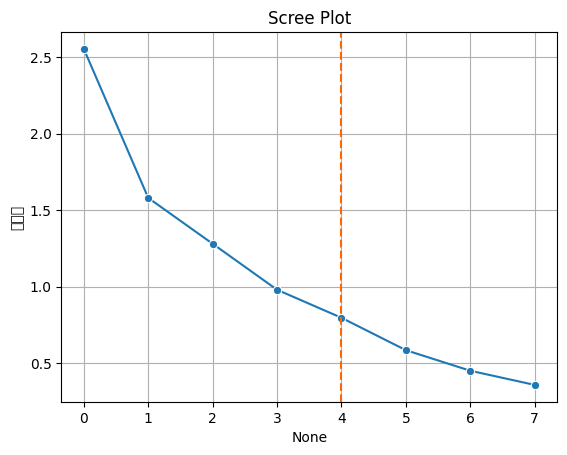

In [ ]:
fig, ax = plt.subplots(1,1)
sns.lineplot(x=e_value.index, y='고유값', marker='o', data=e_value, ax=ax)
ax.grid()
ax.set_title('Scree Plot')
for i, v in enumerate(e_value['누적기여율']):
    if v > 0.8:
        ax.axvline(e_value.index[i], ls='--', color='#ff6600')
        best_dim = i+1
        break

plt.show()

In [34]:
from sklearn.pipeline import Pipeline

pca = PCA(n_components=best_dim, svd_solver='auto')

pcadf = pd.DataFrame()
for i, col, model in zip(range(len(models)), model_names, models):
    pipe = Pipeline(steps=[('pca',pca), ('model',model)])
    tbegin = time.time()
    pipe.fit(X_train, y_train)
    tend = time.time()
    pcadf.loc[i, 'feature'] = col
    pcadf.loc[i, 'elapsed'] = tend-tbegin
    pcadf.loc[i, 'score'] =  pipe.score(X_test, y_test)
pcadf
    


,feature,elapsed,score
0,LogisticRegression,0.004001,0.844622
1,SVC,0.010997,0.824701
2,RandomForestClassifier,1.514357,0.816733
3,XGBClassifier,0.054997,0.800797


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import FactorAnalysis
best_dim = 5
fa = FactorAnalysis(n_components=best_dim)
param_grid = {'fa__n_components':[4,5,6]}

searchdf = pd.DataFrame()
for i, col, model in zip(range(len(models)), model_names, models):
    pipe = Pipeline(steps=[('fa',fa), ('model', model)])
    search = GridSearchCV(pipe, param_grid=param_grid, cv=4)
    search.fit(X_train, y_train)
    searchdf.loc[i, 'model'] = col
    searchdf.loc[i, 'best number'] = str(search.best_params_.get('fa__n_components'))
    searchdf.loc[i, 'beste score'] = search.score(X_test, y_test)

searchdf

,model,best number,beste score
0,LogisticRegression,6,0.856574
1,SVC,6,0.836653
2,RandomForestClassifier,6,0.828685
3,XGBClassifier,6,0.804781


예측 성능은 다소 상승되었고 속도 측면에도 차원축소에 의해 더 빨라졌다.  
향후에 데이터가 크게 늘어난다면 성능 및 속도 측면에서 더 유의미한 차이가 클 것으로 보인다.